<a href="https://colab.research.google.com/github/PratishZaware/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**

## **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [ ]:
#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive                                                    # mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stockprice_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_Capstone_Projects/data_YesBank_StockPrices.csv')        #Reading Dataset

In [ ]:
stockprice_df.head()                                           # Overview of dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
stockprice_df.shape                                            # returns dimensionality of the DataFrame

(185, 5)

In [ ]:
ybsp_df = stockprice_df.copy()                                 # creating copy of dataframe

In [ ]:
ybsp_df.info()                                                 # Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Here our date feature is of object dtype, so the date column needs to be converted into a date time format.

In [ ]:
#importing datetime
from datetime import datetime
#parsing date which is string of format %b-%y to datetime (%b is for Jul i.e month short form and %y is for year in two digit)
ybsp_df['Date'] = ybsp_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
ybsp_df.info()                                                   # Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


we don't have any null values

In [ ]:
ybsp_df.describe()                                                    # generate descriptive statistic

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
duplicate = ybsp_df[stockprice_df.duplicated()]                                  # Checking for duplicate rows
print(duplicate)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []


We don't have duplicate values

## **Exploratory Data Analysis**

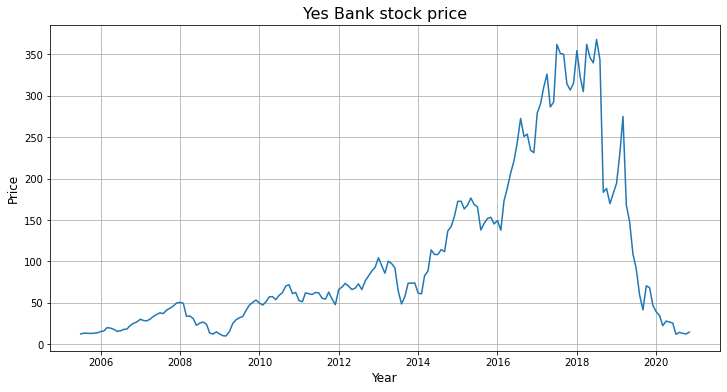

In [ ]:
#plotting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(ybsp_df['Date'], ybsp_df['Close'])
plt.title('Yes Bank stock price', fontsize=16)
plt.show()

Stock price went down since 2018.

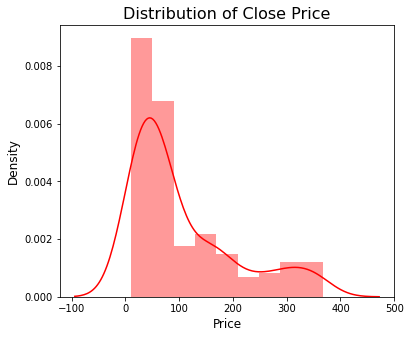

In [ ]:
#distribution plot of Close price to look for normal distribution
plt.figure(figsize=(6,5))
sns.distplot(ybsp_df['Close'],color='red')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Distribution of close price is right skewed

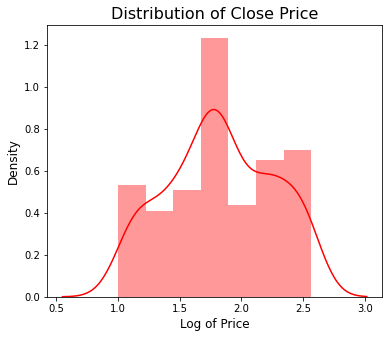

In [ ]:
#distribution plot of Close price by applying log transformation
plt.figure(figsize=(6,5))
sns.distplot(np.log10(ybsp_df['Close']),color='red')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Log of Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Normal distribution of close price

In [ ]:
#make a list of independant numerical variables
numerical_features = list(set(ybsp_df.describe().columns) - {'Close'})
numerical_features

['Open', 'High', 'Low']

<function matplotlib.pyplot.show(*args, **kw)>

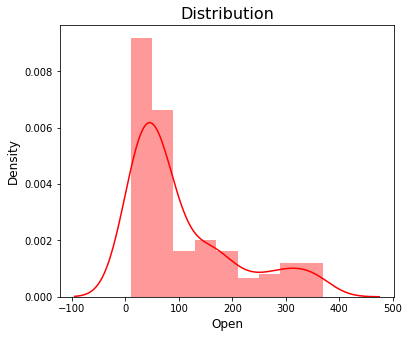

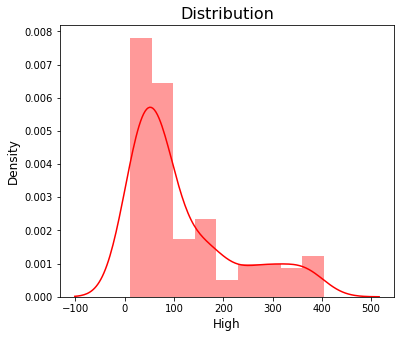

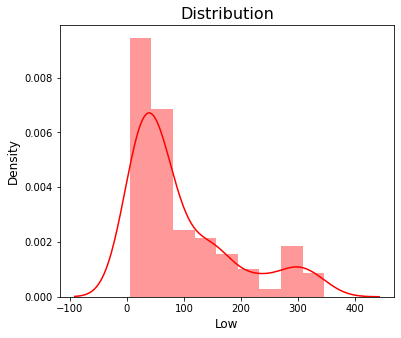

In [ ]:
#Plotting distribution for each of numerical features.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(ybsp_df[col], color='red')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

All features are right skewed

<function matplotlib.pyplot.show(*args, **kw)>

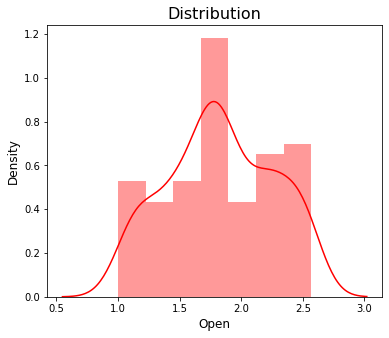

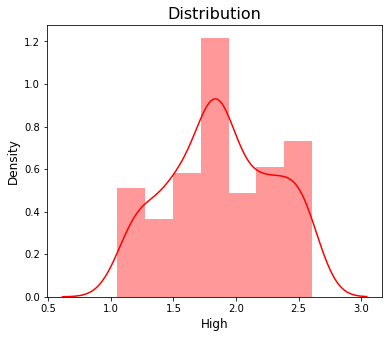

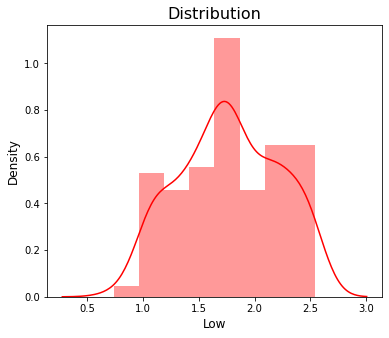

In [ ]:
#Plotting distribution for each of numerical features by applying log transformation
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(ybsp_df[col]), color='red')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

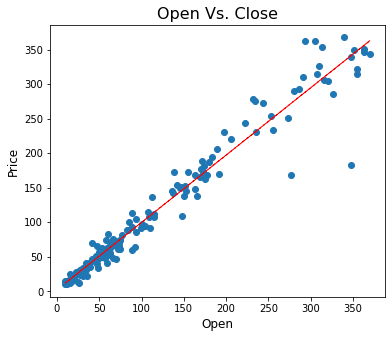

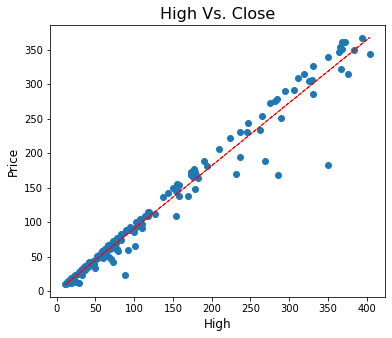

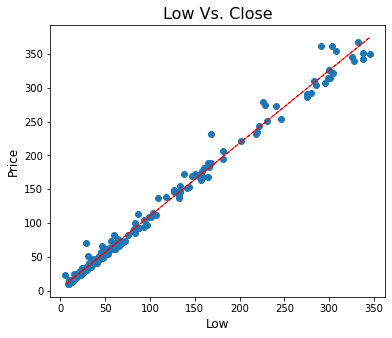

In [ ]:
for col in numerical_features:                                                           # plotting scatter plot between independent variable and dependent variable
   fig = plt.figure(figsize=(6, 5))
   ax = fig.gca()
   feature = ybsp_df[col]
   label = ybsp_df['Close']
   plt.scatter(x=feature, y=label)
   plt.xlabel(col, fontsize=12)
   plt.ylabel('Price', fontsize=12)
   ax.set_title(col + ' Vs. Close', fontsize=16)
   z = np.polyfit(ybsp_df[col], ybsp_df['Close'], 1)
   y_hat = np.poly1d(z)(ybsp_df[col])
 
   plt.plot(ybsp_df[col], y_hat, "r--", lw=1)

All independent variables affecting linearly to dependent variable.

Text(0.5, 1.0, 'Correlation Map')

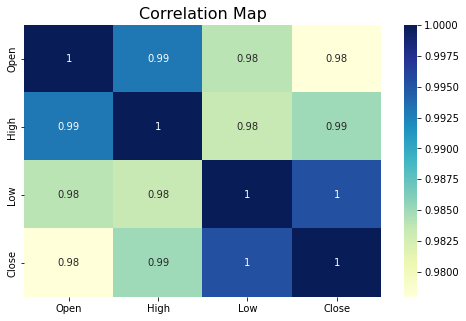

In [ ]:
# Correlation
plt.figure(figsize=(8,5))
correlation = ybsp_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')
plt.title("Correlation Map", fontsize=16)

All variables are strongly correleated to each other

## **Transforming & Spliting Data**

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = ybsp_df.drop(columns=['Close','Date'])
y = ybsp_df['Close']

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [ ]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

In [ ]:
#Creating empty data frame for each regression model 
i=0
evaluation_matrix = pd.DataFrame()

## **Linear Regression**

In [ ]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)


LinearRegression()

In [ ]:
linear_reg.intercept_

1.8292785179315048

In [ ]:
linear_reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.815

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.823

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error((y_test),(y_pred)),3)
print("MAE :", MAE)

MSE = round(mean_squared_error((y_test),(
    y_pred)),3)
print("MSE :", MSE)

RMSE = round(np.sqrt(MSE),3)
print("RMSE :", RMSE)

R2 = round(r2_score((y_test), (y_pred)),3)
print("R2 :" , R2)

Adjusted_R2 = round(1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2:", Adjusted_R2)

MAE : 0.151
MSE : 0.032
RMSE : 0.179
R2 : 0.823
Adjusted R2: 0.806


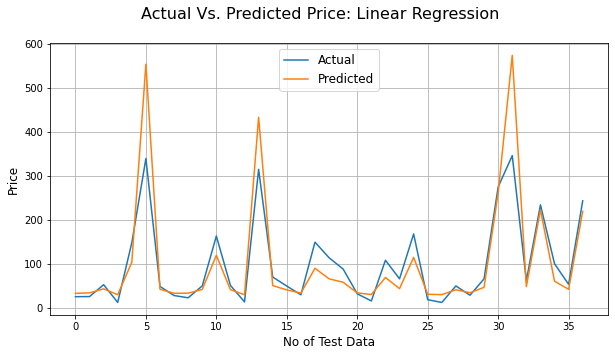

In [ ]:
# Actual Price vs. Predicted Price for Linear Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(10**y_test))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs. Predicted Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()

## **Lasso Regression**

In [ ]:
#fitting data into Lasso Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.005,max_iter=3000)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.005, max_iter=3000)

In [ ]:
#accuracy of lasso regression model
round(lasso_reg.score(X_train,y_train),3)

0.814

In [ ]:
#prediction of test data.
y_pred_lasso = lasso_reg.predict(X_test)

In [ ]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),3))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 3))

MSE : 0.032
RMSE : 0.179
MAE : 0.152
MAPE : 0.096
R2 : 0.82


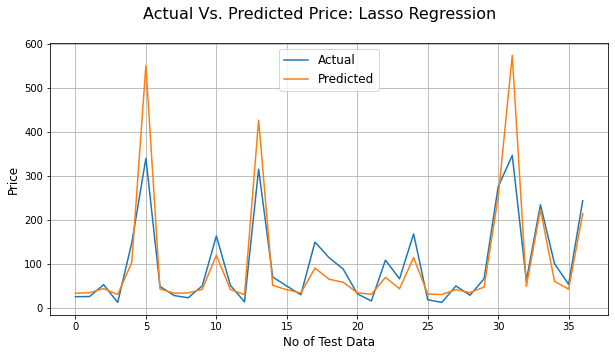

In [ ]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(np.array(10**y_test))
plt.plot(10**(y_pred_lasso))
plt.suptitle('Actual Vs. Predicted Price: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()

In [ ]:
print(lasso_reg.coef_)

[0.         0.16040506 0.21820527]


In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,100,]}  
# alpha is the hyperparameter which we wanted to tuned and inside we give some random values   
                                                                                  
lasso_regressor = GridSearchCV(lasso_cv, parameters, scoring='neg_mean_squared_error', cv=5)   #this GridSearchCV try each of the values of alpha 

lasso_regressor.fit(X_train, y_train)                                                       #cv=5 means we dividing our data into 5 folds

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03671253815080321


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)
print(y_pred_lasso)

[1.5246758  1.53967822 1.64330447 1.48473667 2.01244712 2.7285637
 1.63520241 1.52506422 1.53318726 1.62734999 2.07429343 1.62111986
 1.48267825 2.61894213 1.7086131  1.61716593 1.53236729 1.9545761
 1.81309013 1.76452438 1.53980312 1.49069997 1.84005176 1.64003515
 2.05511403 1.49942522 1.48609019 1.6186234  1.54359818 1.67617522
 2.39311476 2.74618564 1.68942791 2.34233898 1.78097189 1.62960909
 2.32426455]


Text(0.5, 1.0, 'Actual vs Predicted Closing price')

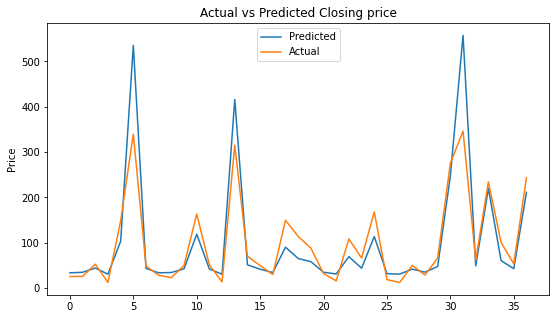

In [ ]:
#actual vs y_pred_lasso values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(y_test, y_pred_lasso), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((y_test),(y_pred_lasso)),3)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),3)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_lasso)),3)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3))

MAE : 0.153
MSE : 0.032
RMSE : 0.179
R2 : 0.819
Adjusted R2 :  0.803


## **Ridge Regression**

In [ ]:
#fitting data into Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [ ]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),3)

0.815

In [ ]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(y_test, y_pred_ridge), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((y_test),(y_pred_ridge)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_ridge)),4)
print("R2 :" ,r2)
print("Adjusted R2 : ",round(1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MAE : 0.151
MSE : 0.0316
RMSE : 0.1778
R2 : 0.8225
Adjusted R2 :  0.8064


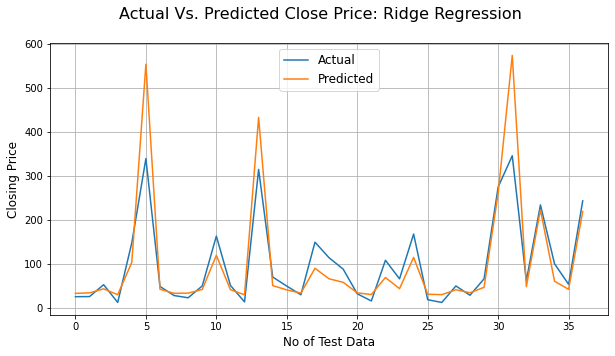

In [ ]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

In [ ]:
# Hyperparameter tunning
ridge_reg = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is  :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is  : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Closing price')

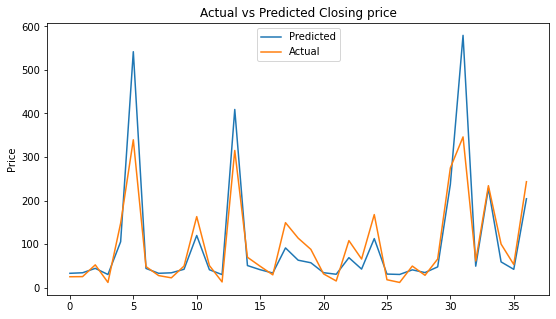

In [ ]:
#actual vs y_pred_ridge values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(y_test, y_pred_ridge), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((y_test),(y_pred_ridge)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_ridge)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MAE : 0.153
MSE : 0.0325
RMSE : 0.1803
R2 : 0.8172
Adjusted R2 : 0.8006


## **Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
                                                                                 
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)                                 #a * L1 + b * L2  #alpha = a + b and l1_ratio = a / (a + b)

In [ ]:
# fitting the train model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.7958095661377872

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(y_test, y_pred_en), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((y_test),(y_pred_en)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_en)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MAE : 0.157
MSE : 0.0364
RMSE : 0.1908
R2 : 0.7955
Adjusted R2 : 0.7769


In [ ]:
# hyperparameter tunning
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.03677704532078478


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
#Calculating MAE, MSE, RMSE, R^2, Adjusted R^2
MAE = round(mean_absolute_error(y_test, y_pred_en), 3)
print("MAE :" , MAE)

MSE  = round(mean_squared_error((y_test),(y_pred_elastic)),4)
print("MSE :" , MSE)

RMSE = round(np.sqrt(MSE),4)
print("RMSE :" ,RMSE)

r2 = round(r2_score((y_test), (y_pred_elastic)),4)
print("R2 :" ,r2)
print("Adjusted R2 :",round(1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),4))

MAE : 0.157
MSE : 0.0321
RMSE : 0.1792
R2 : 0.8195
Adjusted R2 : 0.8031


Text(0.5, 1.0, 'Actual vs Predicted Closing price')

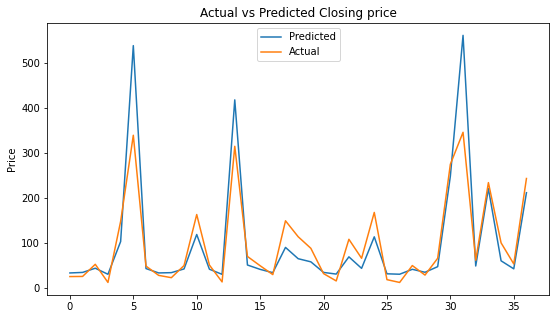

In [ ]:
#actual vs y_pred_elastic values plot
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price")

In [ ]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 3)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
    MAE = round(mean_absolute_error(y_test, y_pred),3)
    #MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
    R2 = round(r2_score(y_test, y_pred), 3)

    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "R2"] = R2

    #to get values in next rows for next model
    i=i+1

  #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df

In [ ]:
all_model = [linear_reg, lasso_reg, ridge_reg, elasticnet]

In [ ]:
#Evaluation Matrics Comparison
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, all_model)
matrics_compare_df

,Model,MSE,RMSE,MAE,R2
0,LinearRegression,0.032,0.178,0.151,0.823
1,Lasso,0.032,0.179,0.152,0.820
2,Ridge,0.032,0.179,0.152,0.820
3,ElasticNet,0.036,0.191,0.157,0.796


## **Conclusion**

1.We got a maximum accuracy of 82%.

2.Linear, lasso and ridge regression show almost same R squared values.

3.Whereas elastic net model shows lowest R squared value and high MSE, RMSE, MAE

4.Close, Open and high price of stock are strongly correlated with each other.